<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Selecci%C3%B3n_y_Generaci%C3%B3n_de_Prototipos_Pr%C3%A1ctica_usando_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ======================================================================
# 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor/a: Diego Jaziel Olmos Aguilera
# 📅 Fecha: 22/05/2025
# ======================================================================

## 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

## 1. Cargar librerías necesarias
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import random


# --------------------------------------------------------------------------

## 2. Cargar y explorar el conjunto de datos Breast Cancer
- Cargar el dataset con sklearn.datasets.load_breast_cancer
- Explora las dimensiones, variables, y distribución de clases

--------------------------------------------------------------------------------


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Dimensiones del dataset:  (569, 31)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Vista previa del Dataset:



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0




--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Distribución de clases:



,count
target,
1,357
0,212


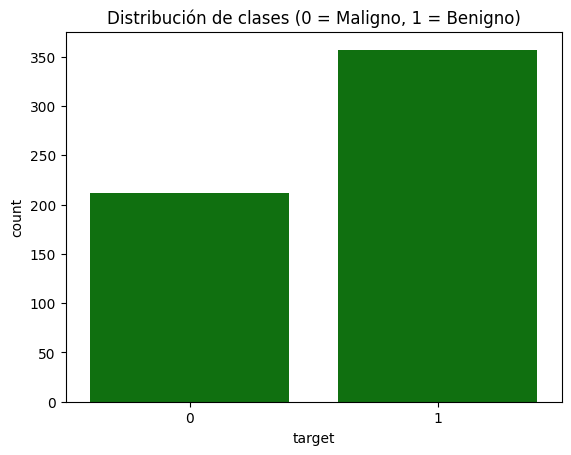



--------------------------------------------------------------------------------


In [10]:
data = load_breast_cancer()

print('-' * 80)
print('\n')

print(data.keys())

print('\n')
print('-' * 80)

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

print('-' * 80)
print('\n')

print('Dimensiones del dataset: ', df.shape)

print('\n')
print('-' * 80)

print('-' * 80)
print('\n')

print('Vista previa del Dataset:\n')
display(df.head())

print('\n')
print('-' * 80)

print('-' * 80)
print('\n')

print('Distribución de clases:\n')
display(df['target'].value_counts())

print('\n')

sns.countplot(x = 'target', data = df, color = 'green')
plt.title('Distribución de clases (0 = Maligno, 1 = Benigno)')
plt.show()

print('\n')
print('-' * 80)

# --------------------------------------------------------------------------

## 3. Preprocesamiento
 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba
 - usar hold-out de 70% y 30%



In [14]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

print('-' * 80)
print('\n')

print('Dimensiones del conjunto de entrenamiento: ', X_train.shape)
print('Dimensiones del conjunto de prueba: ', X_test.shape)

print('\n')
print('-' * 80)

scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)


--------------------------------------------------------------------------------


Dimensiones del conjunto de entrenamiento:  (398, 30)
Dimensiones del conjunto de prueba:  (171, 30)


--------------------------------------------------------------------------------


# --------------------------------------------------------------------------

## 4. Aplicar técnica CNN (Condensed Nearest Neighbor)

- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [21]:
class CNN:

    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def select_data(self, X, y):
        # Validación de entrada: datos densos
        X, y = check_X_y(X, y, accept_sparse=False)

        idx_s = []  # índice de instancias seleccionadas
        classes = np.unique(y)
        self.classes_ = classes

        # Iniciar con una instancia aleatoria por clase
        for cur_class in classes:
            mask = np.where(y == cur_class)[0]
            choose_id = random.choice(mask)
            idx_s.append(choose_id)

        # Revisión aleatoria del resto de las instancias
        train_idx = list(range(len(y)))
        random.shuffle(train_idx)

        flag = True
        while flag:
            flag = False
            self.classifier.fit(X[idx_s], y[idx_s])
            for idx in train_idx:
                if idx not in idx_s:
                    x_i = X[idx].reshape(1, -1)
                    if self.classifier.predict(x_i) != [y[idx]]:
                        idx_s.append(idx)
                        self.classifier.fit(X[idx_s], y[idx_s])
                        flag = True

        self.X_ = X[idx_s]
        self.y_ = y[idx_s]
        self.sample_indices_ = sorted(idx_s)
        self.reduction_ = 1.0 - len(self.y_) / len(y)
        return self.X_, self.y_

cnn = CNN()
X_train_cnn, y_train_cnn = cnn.select_data(X_train_scaled, y_train)

print('-' * 80)
print('\n')

print('Tamaño original del conjunto de entrenamiento: ', X_train_scaled.shape)

print('\n')
print('-' * 80)

print('-' * 80)
print('\n')

print('Tamaño reducido después de CNN: ', X_train_cnn.shape)

print('\n')
print('-' * 80)

print('-' * 80)
print('\n')

print(f'Reducción de datos: {cnn.reduction_ * 100:.2f}%')

print('\n')
print('-' * 80)

--------------------------------------------------------------------------------


Tamaño original del conjunto de entrenamiento:  (398, 30)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Tamaño reducido después de CNN:  (61, 30)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Reducción de datos: 84.67%


--------------------------------------------------------------------------------


 --------------------------------------------------------------------------

## 5. Aplicar técnica ENN (Edited Nearest Neighbor)

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [27]:
class ENN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def fit(self, X, y):
        # Validación inicial
        X, y = check_X_y(X, y, accept_sparse=False)

        mask = np.ones(len(y), dtype=bool)
        tmp_m = np.ones(len(y), dtype=bool)

        indices = list(range(len(y)))
        random.shuffle(indices)

        for i in indices:
            tmp_m[i] = False
            self.classifier.fit(X[tmp_m], y[tmp_m])
            x_i = X[i].reshape(1, -1)
            y_pred = self.classifier.predict(x_i)
            if y_pred[0] != y[i]:
                mask[i] = False
            tmp_m[i] = True

        self.X_ = X[mask]
        self.y_ = y[mask]
        self.sample_indices_ = np.where(mask)[0]
        self.reduction_ = 1 - len(self.y_) / len(y)
        return self

enn = ENN()
enn.fit(X_train_scaled, y_train)

X_train_enn = enn.X_
y_train_enn = enn.y_

print('-' * 80)
print('\n')

print('Tamaño original del conjunto de entrenamiento: ', X_train_scaled.shape)

print('\n')
print('-' * 80)

print('-' * 80)
print('\n')

print('Tamaño reducido después de ENN: ', X_train_enn.shape)

print('\n')
print('-' * 80)

print('-' * 80)
print('\n')

print(f'Reducción de datos: {enn.reduction_ * 100:.2f}%')

print('\n')
print('-' * 80)


--------------------------------------------------------------------------------


Tamaño original del conjunto de entrenamiento:  (398, 30)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Tamaño reducido después de ENN:  (386, 30)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Reducción de datos: 3.02%


--------------------------------------------------------------------------------


# --------------------------------------------------------------------------

## 6. Aplicar reducción mediante K-medias
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



In [28]:
X_train_0 = X_train_scaled[y_train == 0]
X_train_1 = X_train_scaled[y_train == 1]

n_centroides_0 = len(X_train_0) // 2
n_centroides_1 = len(X_train_1) // 2

print('-' * 80)
print('\n')

print(f'Número de centroides para la clase 0 (Maligno): {n_centroides_0}')
print(f'Número de centroides para la clase 1 (Benigno): {n_centroides_1}')

print('\n')
print('-' * 80)

kmeans_0 = KMeans(n_clusters = n_centroides_0, random_state = 42, n_init = 10)
kmeans_1 = KMeans(n_clusters = n_centroides_1, random_state = 42, n_init = 10)

kmeans_0.fit(X_train_0)
kmeans_1.fit(X_train_1)

centroides_0 = kmeans_0.cluster_centers_
centroides_1 = kmeans_1.cluster_centers_

labels_0 = np.zeros(n_centroides_0)
labels_1 = np.ones(n_centroides_1)

X_train_kmeans = np.vstack((centroides_0, centroides_1))
y_train_kmeans = np.hstack((labels_0, labels_1))

print('-' * 80)
print('\n')

print('Tamaño original del conjunto de entrenamiento: ', X_train_scaled.shape)

print('\n')
print('-' * 80)

print('-' * 80)
print('\n')

print('Tamaño reducido después de K-means: ', X_train_kmeans.shape)

print('\n')
print('-' * 80)

print('-' * 80)
print('\n')

df_kmeans = pd.DataFrame({'Clase': ['Maligno', 'Benigno'], 'Original': [len(X_train_0), len(X_train_1)], 'Reducido (Centroides)': [n_centroides_0, n_centroides_1]})

display(df_kmeans)

print('\n')
print('-' * 80)

--------------------------------------------------------------------------------


Número de centroides para la clase 0 (Maligno): 74
Número de centroides para la clase 1 (Benigno): 125


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Tamaño original del conjunto de entrenamiento:  (398, 30)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


Tamaño reducido después de K-means:  (199, 30)


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




,Clase,Original,Reducido (Centroides)
0,Maligno,148,74
1,Benigno,250,125




--------------------------------------------------------------------------------


 --------------------------------------------------------------------------

##7. Entrenar SVM sobre cada conjunto reducido
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



In [29]:
# ==============================================================================
# SVM
# ==============================================================================

svm_original = SVC(random_state = 42)
svm_cnn = SVC(random_state = 42)
svm_enn = SVC(random_state = 42)
svm_kmeans = SVC(random_state = 42)

# ==============================================================================
# DATOS ORIGINALES
# ==============================================================================

svm_original.fit(X_train_scaled, y_train)
y_pred_original = svm_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

# ==============================================================================
# CNN
# ==============================================================================

svm_cnn.fit(X_train_cnn, y_train_cnn)
y_pred_cnn = svm_cnn.predict(X_test_scaled)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)

# ==============================================================================
# ENN
# ==============================================================================

svm_enn.fit(X_train_enn, y_train_enn)
y_pred_enn = svm_enn.predict(X_test_scaled)
acc_enn = accuracy_score(y_test, y_pred_enn)
f1_enn = f1_score(y_test, y_pred_enn)

# ==============================================================================
# K-MEANS
# ==============================================================================

svm_kmeans.fit(X_train_kmeans, y_train_kmeans)
y_pred_kmeans = svm_kmeans.predict(X_test_scaled)
acc_kmeans = accuracy_score(y_test, y_pred_kmeans)
f1_kmeans = f1_score(y_test, y_pred_kmeans)

# ==============================================================================
#
# ==============================================================================

resultados = pd.DataFrame({
    'Conjunto': ['Original', 'CNN', 'ENN', 'K-means'],
    'Accuracy': [acc_original, acc_cnn, acc_enn, acc_kmeans],
    'F1-score': [f1_original, f1_cnn, f1_enn, f1_kmeans]
})

display(resultados)


,Conjunto,Accuracy,F1-score
0,Original,0.976608,0.981308
1,CNN,0.959064,0.968037
2,ENN,0.959064,0.967742
3,K-means,0.964912,0.972727


# --------------------------------------------------------------------------

## **📊 8. Comparar los resultados y reflexión final**
# **- Comparar las métricas de rendimiento obtenidas con cada técnica**

      - El modelo entrenado con los **datos originales** obtiene el mejor desempeño, con un accuracy de aproximadamente 97.66% y un F1-score de aproximadamente 98.13%
      
      - Con las tecnicas de reducción de la numerosidad:
        - **K-means** detaca como la técnica de reducción que mejor conserva las métricas, con un accuracy aproximadamente de 96.49% y un F1-score de aproximadamente 97.27%.
        - **CNN** y **ENN** tienen resultados muy similares entre sí, y se encuentran por debajo de K-means, aun que muy poco.

# **- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad**

      - La reducción de la numerosidad permite disminuir la cantidad de instancias en el conjunto de entrenamiento, lo cual puede tener un efecto positivo en el tiempo de entrenamiento y en algunos casos ayudar a eliminar ruido o datos redundantes. Sin embargo, es importante verificar que esta reducción no afecte significativamente la capacidad de generalización del modelo.

# **- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?**

      - K-means resultó ser la técnica más efectiva. CNN y ENN también lograron reducir el conjunto de datos, pero su desempeño fue ligeramente inferior al de K-means. Aun así, sus métricas se mantuvieron bastante aceptables, lo cual demuestra que estas técnicas pueden ser útiles en escenarios donde se requiere disminuir el tamaño del dataset sin perder demasiada precisión.

      Ventajas:

        - Disminución del tamaño del conjunto de entrenamiento.
        - Se conserva un buen desempeño del modelo.
        - Potencial reducción del tiempo de entrenamiento.

      Desventajas:

        - CNN y ENN pueden llegar a ser sensibles al orden de los datos y a la distribución local de los vecinos.
        - Existe un riesgo de eliminar instancias importantes para la clasificación si no se aplican adecuadamente.
        - K-means requiere definir el número de centroides por clase, y elegir ese número correctamente puede ser compicado en datasets con estructuras más complejas.
